#  Data Collection

In [122]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 51.5085,
	"longitude": -0.1257,
	"start_date": "2021-01-01",
	"end_date": "2023-12-31",
	"hourly": "temperature_2m",
    "timezone": "Europe/London"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["London Temperature"] = hourly_temperature_2m

hourly_london = pd.DataFrame(data = hourly_data)
hourly_london

Coordinates 51.49384689331055°N -0.16302490234375°E
Elevation 23.0 m asl
Timezone b'Europe/London' b'BST'
Timezone difference to GMT+0 3600 s


,date,London Temperature
0,2020-12-31 23:00:00+00:00,-0.9935
1,2021-01-01 00:00:00+00:00,-0.1935
2,2021-01-01 01:00:00+00:00,-0.7435
3,2021-01-01 02:00:00+00:00,-1.1435
4,2021-01-01 03:00:00+00:00,-1.7435
...,...,...
26275,2023-12-31 18:00:00+00:00,8.0565
26276,2023-12-31 19:00:00+00:00,7.9565
26277,2023-12-31 20:00:00+00:00,7.6565
26278,2023-12-31 21:00:00+00:00,8.0565


In [123]:
params = {
	"latitude": 55.8651,
	"longitude": -4.2576,
	"start_date": "2021-01-01",
	"end_date": "2023-12-31",
	"hourly": "temperature_2m",
    "timezone": "Europe/London"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["Glassgow Temperature"] = hourly_temperature_2m

hourly_glasgow = pd.DataFrame(data = hourly_data)
hourly_glasgow

Coordinates 55.85237121582031°N -4.2244873046875°E
Elevation 38.0 m asl
Timezone b'Europe/London' b'BST'
Timezone difference to GMT+0 3600 s


,date,Glassgow Temperature
0,2020-12-31 23:00:00+00:00,0.7255
1,2021-01-01 00:00:00+00:00,-0.3245
2,2021-01-01 01:00:00+00:00,-1.1245
3,2021-01-01 02:00:00+00:00,-1.4245
4,2021-01-01 03:00:00+00:00,-0.7245
...,...,...
26275,2023-12-31 18:00:00+00:00,3.7255
26276,2023-12-31 19:00:00+00:00,2.3255
26277,2023-12-31 20:00:00+00:00,2.0255
26278,2023-12-31 21:00:00+00:00,1.0255


In [124]:
params = {
	"latitude": 51.48,
	"longitude": -3.18,
	"start_date": "2021-01-01",
	"end_date": "2023-12-31",
	"hourly": "temperature_2m",
    "timezone": "Europe/London"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["Cardiff Temperature"] = hourly_temperature_2m

hourly_cardiff = pd.DataFrame(data = hourly_data)
hourly_cardiff

Coordinates 51.49384689331055°N -3.2608642578125°E
Elevation 17.0 m asl
Timezone b'Europe/London' b'BST'
Timezone difference to GMT+0 3600 s


,date,Cardiff Temperature
0,2020-12-31 23:00:00+00:00,-2.8965
1,2021-01-01 00:00:00+00:00,-2.3465
2,2021-01-01 01:00:00+00:00,-2.6965
3,2021-01-01 02:00:00+00:00,-2.8465
4,2021-01-01 03:00:00+00:00,-3.1465
...,...,...
26275,2023-12-31 18:00:00+00:00,7.9035
26276,2023-12-31 19:00:00+00:00,7.7535
26277,2023-12-31 20:00:00+00:00,7.6035
26278,2023-12-31 21:00:00+00:00,7.9535


In [14]:
import requests
import pandas as pd
from io import StringIO

# API endpoint URL
url = 'https://api.nationalgrideso.com/api/3/action/datastore_search?resource_id=bf5ab335-9b40-4ea4-b93a-ab4af7bce003'
limit = 100  # Number of records per page
offset = 0   # Initial offset

# List to store data frames
dfs = []

# Loop until all rows are fetched
while True:
    # Construct the URL with offset and limit parameters
    params = {'offset': offset, 'limit': limit}
    response = requests.get(url, params=params)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Read the JSON response
        json_data = response.json()
        
        # Extract records from the JSON response
        records = json_data.get('result', {}).get('records', [])
        
        # If no more records, exit the loop
        if not records:
            break
        
        # Convert records to DataFrame
        df = pd.DataFrame(records)
        
        # Append the DataFrame to the list
        dfs.append(df)
        
        # Increment the offset for the next page
        offset += limit
    else:
        print(f"Error: {response.status_code} - {response.text}")
        break

# Concatenate all DataFrames into a single DataFrame
final_df = pd.concat(dfs, ignore_index=True)

# Print the first few rows of the final DataFrame
print(final_df.head())


   _id SETTLEMENT_DATE  SETTLEMENT_PERIOD     ND    TSD  ENGLAND_WALES_DEMAND  \
0    1      2023-01-01                  1  21043  24680                 18995   
1    2      2023-01-01                  2  21756  25289                 19730   
2    3      2023-01-01                  3  21348  25269                 19327   
3    4      2023-01-01                  4  20586  24574                 18589   
4    5      2023-01-01                  5  19781  24135                 17806   

   EMBEDDED_WIND_GENERATION  EMBEDDED_WIND_CAPACITY  \
0                      2815                    6545   
1                      2793                    6545   
2                      2773                    6545   
3                      2753                    6545   
4                      2712                    6545   

   EMBEDDED_SOLAR_GENERATION  EMBEDDED_SOLAR_CAPACITY  ...  SCOTTISH_TRANSFER  \
0                          0                    15005  ...               1194   
1                   

In [16]:
final_df

,_id,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,...,SCOTTISH_TRANSFER,IFA_FLOW,IFA2_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,NEMO_FLOW,NSL_FLOW,ELECLINK_FLOW,VIKING_FLOW
0,1,2023-01-01,1,21043,24680,18995,2815,6545,0,15005,...,1194,609,903,-896,-451,-529,253,235,998,0
1,2,2023-01-01,2,21756,25289,19730,2793,6545,0,15005,...,1191,596,904,-897,-451,-529,252,157,998,0
2,3,2023-01-01,3,21348,25269,19327,2773,6545,0,15005,...,969,516,983,-910,-451,-529,253,-219,999,0
3,4,2023-01-01,4,20586,24574,18589,2753,6545,0,15005,...,667,510,989,-911,-413,-529,254,-298,999,0
4,5,2023-01-01,5,19781,24135,17806,2712,6545,0,15005,...,387,600,903,-912,-401,-529,253,-679,998,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,17516,2023-12-31,44,25269,25921,22546,2707,6488,0,15905,...,-535,1879,-4,907,23,0,999,1334,997,601
17516,17517,2023-12-31,45,24254,24977,21608,2734,6488,0,15905,...,-336,1154,-4,1002,111,0,999,960,997,601
17517,17518,2023-12-31,46,23455,24134,20889,2761,6488,0,15905,...,-256,1085,-5,1003,130,0,999,884,998,599
17518,17519,2023-12-31,47,22533,23714,20081,2767,6488,0,15905,...,-30,475,-4,801,71,-63,999,512,998,512


In [17]:
df_2023=final_df

In [24]:
# API endpoint URL
url = 'https://api.nationalgrideso.com/api/3/action/datastore_search?resource_id=bb44a1b5-75b1-4db2-8491-257f23385006'
limit = 100  # Number of records per page
offset = 0   # Initial offset

# List to store data frames
dfs = []

# Loop until all rows are fetched
while True:
    # Construct the URL with offset and limit parameters
    params = {'offset': offset, 'limit': limit}
    response = requests.get(url, params=params)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Read the JSON response
        json_data = response.json()
        
        # Extract records from the JSON response
        records = json_data.get('result', {}).get('records', [])
        
        # If no more records, exit the loop
        if not records:
            break
        
        # Convert records to DataFrame
        df = pd.DataFrame(records)
        
        # Append the DataFrame to the list
        dfs.append(df)
        
        # Increment the offset for the next page
        offset += limit
    else:
        print(f"Error: {response.status_code} - {response.text}")
        break

# Concatenate all DataFrames into a single DataFrame
final_df = pd.concat(dfs, ignore_index=True)

# Print the first few rows of the final DataFrame
print(final_df.head())


   _id SETTLEMENT_DATE  SETTLEMENT_PERIOD     ND    TSD  ENGLAND_WALES_DEMAND  \
0    1      2022-01-01                  1  21940  23275                 20513   
1    2      2022-01-01                  2  22427  23489                 21021   
2    3      2022-01-01                  3  21896  23672                 20619   
3    4      2022-01-01                  4  20693  23272                 19615   
4    5      2022-01-01                  5  19481  23958                 18545   

   EMBEDDED_WIND_GENERATION  EMBEDDED_WIND_CAPACITY  \
0                      2412                    6527   
1                      2554                    6527   
2                      2696                    6527   
3                      2838                    6527   
4                      2977                    6527   

   EMBEDDED_SOLAR_GENERATION  EMBEDDED_SOLAR_CAPACITY  NON_BM_STOR  \
0                          0                    13670            0   
1                          0              

In [25]:
df_2022=final_df
df_2022

,_id,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,PUMP_STORAGE_PUMPING,IFA_FLOW,IFA2_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,NEMO_FLOW,NSL_FLOW,ELECLINK_FLOW
0,1,2022-01-01,1,21940,23275,20513,2412,6527,0,13670,0,450,-181,-4,586,320,384,-100,210,0
1,2,2022-01-01,2,22427,23489,21021,2554,6527,0,13670,0,173,-181,-4,583,320,403,-104,176,0
2,3,2022-01-01,3,21896,23672,20619,2696,6527,0,13670,0,799,-164,-4,567,320,440,-4,-205,0
3,4,2022-01-01,4,20693,23272,19615,2838,6527,0,13670,0,1516,-170,-4,444,320,387,-6,-283,0
4,5,2022-01-01,5,19481,23958,18545,2977,6527,0,13670,0,1490,-753,-4,-383,320,476,-561,-686,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,17516,2022-12-31,44,24160,25634,21879,2592,6545,0,13861,0,184,1004,982,1002,-451,-239,999,1077,997
17516,17517,2022-12-31,45,23223,24788,21040,2701,6545,0,13861,0,124,244,353,473,-451,-390,789,1077,999
17517,17518,2022-12-31,46,22627,24365,20466,2810,6545,0,13861,0,173,114,302,422,-451,-514,772,1054,999
17518,17519,2022-12-31,47,21690,24766,19587,2823,6545,0,13861,0,819,682,863,-679,-451,-527,289,684,998


In [26]:
# API endpoint URL
url = 'https://api.nationalgrideso.com/api/3/action/datastore_search?resource_id=18c69c42-f20d-46f0-84e9-e279045befc6'
limit = 100  # Number of records per page
offset = 0   # Initial offset

# List to store data frames
dfs = []

# Loop until all rows are fetched
while True:
    # Construct the URL with offset and limit parameters
    params = {'offset': offset, 'limit': limit}
    response = requests.get(url, params=params)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Read the JSON response
        json_data = response.json()
        
        # Extract records from the JSON response
        records = json_data.get('result', {}).get('records', [])
        
        # If no more records, exit the loop
        if not records:
            break
        
        # Convert records to DataFrame
        df = pd.DataFrame(records)
        
        # Append the DataFrame to the list
        dfs.append(df)
        
        # Increment the offset for the next page
        offset += limit
    else:
        print(f"Error: {response.status_code} - {response.text}")
        break

# Concatenate all DataFrames into a single DataFrame
final_df = pd.concat(dfs, ignore_index=True)

# Print the first few rows of the final DataFrame
print(final_df.head())


   _id SETTLEMENT_DATE  SETTLEMENT_PERIOD     ND    TSD  ENGLAND_WALES_DEMAND  \
0    1      2021-01-01                  1  28354  28969                 26130   
1    2      2021-01-01                  2  28501  29114                 26281   
2    3      2021-01-01                  3  27759  28376                 25557   
3    4      2021-01-01                  4  26912  27749                 24792   
4    5      2021-01-01                  5  26004  27178                 23933   

   EMBEDDED_WIND_GENERATION  EMBEDDED_WIND_CAPACITY  \
0                      1018                    6527   
1                      1026                    6527   
2                      1039                    6527   
3                      1052                    6527   
4                      1076                    6527   

   EMBEDDED_SOLAR_GENERATION  EMBEDDED_SOLAR_CAPACITY  NON_BM_STOR  \
0                          0                    13080            0   
1                          0              

In [27]:
df_2021=final_df
df_2021

,_id,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,PUMP_STORAGE_PUMPING,IFA_FLOW,IFA2_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,NEMO_FLOW,NSL_FLOW,ELECLINK_FLOW
0,1,2021-01-01,1,28354,28969,26130,1018,6527,0,13080,0,14,2003,-1,0,215,203,999,0,0
1,2,2021-01-01,2,28501,29114,26281,1026,6527,0,13080,0,12,2004,-1,0,359,203,999,0,0
2,3,2021-01-01,3,27759,28376,25557,1039,6527,0,13080,0,16,2004,-1,0,362,202,999,0,0
3,4,2021-01-01,4,26912,27749,24792,1052,6527,0,13080,0,236,2004,-1,0,361,203,1000,0,0
4,5,2021-01-01,5,26004,27178,23933,1076,6527,0,13080,0,573,2004,-1,0,304,203,1000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,17516,2021-12-31,44,25718,26611,23602,2005,6527,0,13080,0,17,-272,-4,1052,321,504,853,693,0
17516,17517,2021-12-31,45,24571,25852,22621,2056,6527,0,13080,0,19,-658,-4,1043,321,504,658,693,0
17517,17518,2021-12-31,46,23743,25039,21850,2107,6527,0,13080,0,22,-670,-4,1016,321,504,642,663,0
17518,17519,2021-12-31,47,22821,23661,21026,2189,6527,0,13080,0,24,-212,-4,624,298,437,31,289,0


#  Data Preparation

In [101]:
df_final=pd.concat([df_2021, df_2022, df_2023])
df_final.reset_index(drop=True, inplace=True)
df_final

,_id,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,...,IFA_FLOW,IFA2_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,NEMO_FLOW,NSL_FLOW,ELECLINK_FLOW,SCOTTISH_TRANSFER,VIKING_FLOW
0,1,2021-01-01,1,28354,28969,26130,1018,6527,0,13080,...,2003,-1,0,215,203,999,0,0,NaN,NaN
1,2,2021-01-01,2,28501,29114,26281,1026,6527,0,13080,...,2004,-1,0,359,203,999,0,0,NaN,NaN
2,3,2021-01-01,3,27759,28376,25557,1039,6527,0,13080,...,2004,-1,0,362,202,999,0,0,NaN,NaN
3,4,2021-01-01,4,26912,27749,24792,1052,6527,0,13080,...,2004,-1,0,361,203,1000,0,0,NaN,NaN
4,5,2021-01-01,5,26004,27178,23933,1076,6527,0,13080,...,2004,-1,0,304,203,1000,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52555,17516,2023-12-31,44,25269,25921,22546,2707,6488,0,15905,...,1879,-4,907,23,0,999,1334,997,-535.0,601.0
52556,17517,2023-12-31,45,24254,24977,21608,2734,6488,0,15905,...,1154,-4,1002,111,0,999,960,997,-336.0,601.0
52557,17518,2023-12-31,46,23455,24134,20889,2761,6488,0,15905,...,1085,-5,1003,130,0,999,884,998,-256.0,599.0
52558,17519,2023-12-31,47,22533,23714,20081,2767,6488,0,15905,...,475,-4,801,71,-63,999,512,998,-30.0,512.0


In [102]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   _id                        52560 non-null  int64  
 1   SETTLEMENT_DATE            52560 non-null  object 
 2   SETTLEMENT_PERIOD          52560 non-null  int64  
 3   ND                         52560 non-null  int64  
 4   TSD                        52560 non-null  int64  
 5   ENGLAND_WALES_DEMAND       52560 non-null  int64  
 6   EMBEDDED_WIND_GENERATION   52560 non-null  int64  
 7   EMBEDDED_WIND_CAPACITY     52560 non-null  int64  
 8   EMBEDDED_SOLAR_GENERATION  52560 non-null  int64  
 9   EMBEDDED_SOLAR_CAPACITY    52560 non-null  int64  
 10  NON_BM_STOR                52560 non-null  int64  
 11  PUMP_STORAGE_PUMPING       52560 non-null  int64  
 12  IFA_FLOW                   52560 non-null  int64  
 13  IFA2_FLOW                  52560 non-null  int

In [103]:
df_final = df_final.iloc[:, [1,2,3,5,6,7,8,9]] 
df_final

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY
0,2021-01-01,1,28354,26130,1018,6527,0,13080
1,2021-01-01,2,28501,26281,1026,6527,0,13080
2,2021-01-01,3,27759,25557,1039,6527,0,13080
3,2021-01-01,4,26912,24792,1052,6527,0,13080
4,2021-01-01,5,26004,23933,1076,6527,0,13080
...,...,...,...,...,...,...,...,...
52555,2023-12-31,44,25269,22546,2707,6488,0,15905
52556,2023-12-31,45,24254,21608,2734,6488,0,15905
52557,2023-12-31,46,23455,20889,2761,6488,0,15905
52558,2023-12-31,47,22533,20081,2767,6488,0,15905


In [104]:
df_final.describe()

,SETTLEMENT_PERIOD,ND,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY
count,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000
mean,24.500228,27006.382610,24723.962367,1694.849677,6532.963470,1373.566324,14158.090830
std,13.853926,6144.113605,5624.046758,1046.312706,15.210366,2110.246490,1063.526452
min,1.000000,13601.000000,0.000000,147.000000,6488.000000,0.000000,13080.000000
25%,12.750000,22251.000000,20379.000000,844.000000,6527.000000,0.000000,13080.000000
50%,24.500000,26330.000000,24054.000000,1450.000000,6538.000000,8.000000,13861.000000
75%,36.250000,30813.250000,28234.000000,2335.250000,6545.000000,2269.000000,15321.000000
max,50.000000,46433.000000,42458.000000,5539.000000,6574.000000,9830.000000,15954.000000


In [105]:
unique_count = df_final['SETTLEMENT_PERIOD'].nunique()
unique_count

50

In [106]:
check = df_final[df_final['SETTLEMENT_PERIOD'] > 48]
check

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY
14590,2021-10-31,49,21830,19727,2814,6527,0,13080
14591,2021-10-31,50,20967,19018,2844,6527,0,13080
32062,2022-10-30,49,20300,18856,2177,6545,0,13861
32063,2022-10-30,50,19435,18004,2158,6545,0,13861
49538,2023-10-29,49,21492,20130,2320,6488,0,15954
49539,2023-10-29,50,20829,19517,2192,6488,0,15954


In [107]:
# Drop rows where 'Value' column is greater than 48
df_final = df_final.drop(df_final[df_final['SETTLEMENT_PERIOD'] > 48].index)
df_final

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY
0,2021-01-01,1,28354,26130,1018,6527,0,13080
1,2021-01-01,2,28501,26281,1026,6527,0,13080
2,2021-01-01,3,27759,25557,1039,6527,0,13080
3,2021-01-01,4,26912,24792,1052,6527,0,13080
4,2021-01-01,5,26004,23933,1076,6527,0,13080
...,...,...,...,...,...,...,...,...
52555,2023-12-31,44,25269,22546,2707,6488,0,15905
52556,2023-12-31,45,24254,21608,2734,6488,0,15905
52557,2023-12-31,46,23455,20889,2761,6488,0,15905
52558,2023-12-31,47,22533,20081,2767,6488,0,15905


In [108]:
# Define a function to convert half-hourly periods to time format
def convert_to_time(period):
    # Calculate hours and minutes based on the half-hourly period
    if period==48:
        hours=0
        minutes=0
    else:
        hours = period // 2
        minutes = (period % 2) * 30
    # Format the time as HH:MM
    return f'{hours:02d}:{minutes:02d}'

# Apply the conversion function to the 'HalfHourlyPeriod' column
df_final['Time'] = df_final['SETTLEMENT_PERIOD'].apply(convert_to_time)

df_final

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,Time
0,2021-01-01,1,28354,26130,1018,6527,0,13080,00:30
1,2021-01-01,2,28501,26281,1026,6527,0,13080,01:00
2,2021-01-01,3,27759,25557,1039,6527,0,13080,01:30
3,2021-01-01,4,26912,24792,1052,6527,0,13080,02:00
4,2021-01-01,5,26004,23933,1076,6527,0,13080,02:30
...,...,...,...,...,...,...,...,...,...
52555,2023-12-31,44,25269,22546,2707,6488,0,15905,22:00
52556,2023-12-31,45,24254,21608,2734,6488,0,15905,22:30
52557,2023-12-31,46,23455,20889,2761,6488,0,15905,23:00
52558,2023-12-31,47,22533,20081,2767,6488,0,15905,23:30


In [109]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52554 entries, 0 to 52559
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   SETTLEMENT_DATE            52554 non-null  object
 1   SETTLEMENT_PERIOD          52554 non-null  int64 
 2   ND                         52554 non-null  int64 
 3   ENGLAND_WALES_DEMAND       52554 non-null  int64 
 4   EMBEDDED_WIND_GENERATION   52554 non-null  int64 
 5   EMBEDDED_WIND_CAPACITY     52554 non-null  int64 
 6   EMBEDDED_SOLAR_GENERATION  52554 non-null  int64 
 7   EMBEDDED_SOLAR_CAPACITY    52554 non-null  int64 
 8   Time                       52554 non-null  object
dtypes: int64(7), object(2)
memory usage: 4.0+ MB


In [110]:

# Concatenate SETTLEMENT_DATE and Time columns and convert to datetime
df_final['date'] = pd.to_datetime(df_final['SETTLEMENT_DATE'] + ' ' + df_final['Time']+':00', format='%Y-%m-%d %H:%M:%S')
# Shift the datetime for rows where Time is midnight (00:00:00)
df_final.loc[df_final['Time'] == '00:00', 'date'] += pd.DateOffset(days=1)

df_final

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,Time,date
0,2021-01-01,1,28354,26130,1018,6527,0,13080,00:30,2021-01-01 00:30:00
1,2021-01-01,2,28501,26281,1026,6527,0,13080,01:00,2021-01-01 01:00:00
2,2021-01-01,3,27759,25557,1039,6527,0,13080,01:30,2021-01-01 01:30:00
3,2021-01-01,4,26912,24792,1052,6527,0,13080,02:00,2021-01-01 02:00:00
4,2021-01-01,5,26004,23933,1076,6527,0,13080,02:30,2021-01-01 02:30:00
...,...,...,...,...,...,...,...,...,...,...
52555,2023-12-31,44,25269,22546,2707,6488,0,15905,22:00,2023-12-31 22:00:00
52556,2023-12-31,45,24254,21608,2734,6488,0,15905,22:30,2023-12-31 22:30:00
52557,2023-12-31,46,23455,20889,2761,6488,0,15905,23:00,2023-12-31 23:00:00
52558,2023-12-31,47,22533,20081,2767,6488,0,15905,23:30,2023-12-31 23:30:00


In [111]:
df_final = df_final.iloc[:, [9,2,3,4,5,6,7]] 
df_final

,date,ND,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY
0,2021-01-01 00:30:00,28354,26130,1018,6527,0,13080
1,2021-01-01 01:00:00,28501,26281,1026,6527,0,13080
2,2021-01-01 01:30:00,27759,25557,1039,6527,0,13080
3,2021-01-01 02:00:00,26912,24792,1052,6527,0,13080
4,2021-01-01 02:30:00,26004,23933,1076,6527,0,13080
...,...,...,...,...,...,...,...
52555,2023-12-31 22:00:00,25269,22546,2707,6488,0,15905
52556,2023-12-31 22:30:00,24254,21608,2734,6488,0,15905
52557,2023-12-31 23:00:00,23455,20889,2761,6488,0,15905
52558,2023-12-31 23:30:00,22533,20081,2767,6488,0,15905


In [115]:
df_final = df_final.set_index ('date', drop = True)
df_final

,ND,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY
date,,,,,,
2021-01-01 00:30:00,28354,26130,1018,6527,0,13080
2021-01-01 01:00:00,28501,26281,1026,6527,0,13080
2021-01-01 01:30:00,27759,25557,1039,6527,0,13080
2021-01-01 02:00:00,26912,24792,1052,6527,0,13080
2021-01-01 02:30:00,26004,23933,1076,6527,0,13080
...,...,...,...,...,...,...
2023-12-31 22:00:00,25269,22546,2707,6488,0,15905
2023-12-31 22:30:00,24254,21608,2734,6488,0,15905
2023-12-31 23:00:00,23455,20889,2761,6488,0,15905


In [116]:
# Define aggregation methods for each column
aggregations = {
    'ND': 'sum',          
    'ENGLAND_WALES_DEMAND': 'sum',            
    'EMBEDDED_WIND_GENERATION': 'sum',   
    'EMBEDDED_WIND_CAPACITY': 'mean',    
    'EMBEDDED_SOLAR_GENERATION': 'sum',   
    'EMBEDDED_SOLAR_CAPACITY': 'mean'  

}

# Resample the DataFrame using the defined aggregations
df_hourly = df_final.resample('H').agg(aggregations)
df_hourly

C:\Users\ARJUN J\AppData\Local\Temp\ipykernel_1556\3109596328.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df_final.resample('H').agg(aggregations)


,ND,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY
date,,,,,,
2021-01-01 00:00:00,28354,26130,1018,6527.0,0,13080.0
2021-01-01 01:00:00,56260,51838,2065,6527.0,0,13080.0
2021-01-01 02:00:00,52916,48725,2128,6527.0,0,13080.0
2021-01-01 03:00:00,50100,45950,2218,6527.0,0,13080.0
2021-01-01 04:00:00,47959,43959,2302,6527.0,0,13080.0
...,...,...,...,...,...,...
2023-12-31 20:00:00,58104,51965,5223,6488.0,0,15905.0
2023-12-31 21:00:00,53373,47668,5317,6488.0,0,15905.0
2023-12-31 22:00:00,49523,44154,5441,6488.0,0,15905.0


In [127]:
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26281 entries, 2021-01-01 00:00:00 to 2024-01-01 00:00:00
Freq: h
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ND                         26281 non-null  int64  
 1   ENGLAND_WALES_DEMAND       26281 non-null  int64  
 2   EMBEDDED_WIND_GENERATION   26281 non-null  int64  
 3   EMBEDDED_WIND_CAPACITY     26281 non-null  float64
 4   EMBEDDED_SOLAR_GENERATION  26281 non-null  int64  
 5   EMBEDDED_SOLAR_CAPACITY    26281 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 1.4 MB


In [129]:
from functools import reduce
# Merge weather data using reduce and lambda function
dfs = [hourly_london, hourly_cardiff, hourly_glasgow]
merged_df = reduce(lambda left, right: pd.merge(left, right, on='date', how='inner'), dfs)
merged_df = merged_df.set_index ('date', drop = True)
merged_df

,London Temperature,Cardiff Temperature,Glassgow Temperature
date,,,
2020-12-31 23:00:00+00:00,-0.9935,-2.8965,0.7255
2021-01-01 00:00:00+00:00,-0.1935,-2.3465,-0.3245
2021-01-01 01:00:00+00:00,-0.7435,-2.6965,-1.1245
2021-01-01 02:00:00+00:00,-1.1435,-2.8465,-1.4245
2021-01-01 03:00:00+00:00,-1.7435,-3.1465,-0.7245
...,...,...,...
2023-12-31 18:00:00+00:00,8.0565,7.9035,3.7255
2023-12-31 19:00:00+00:00,7.9565,7.7535,2.3255
2023-12-31 20:00:00+00:00,7.6565,7.6035,2.0255


In [132]:
# Convert the timezone-aware index to naive datetime
merged_df.index = merged_df.index.tz_convert(None)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26280 entries, 2020-12-31 23:00:00 to 2023-12-31 22:00:00
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   London Temperature    26280 non-null  float32
 1   Cardiff Temperature   26280 non-null  float32
 2   Glassgow Temperature  26280 non-null  float32
dtypes: float32(3)
memory usage: 513.3 KB


In [133]:
data=pd.merge(df_hourly,merged_df, left_index=True, right_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26279 entries, 2021-01-01 00:00:00 to 2023-12-31 22:00:00
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ND                         26279 non-null  int64  
 1   ENGLAND_WALES_DEMAND       26279 non-null  int64  
 2   EMBEDDED_WIND_GENERATION   26279 non-null  int64  
 3   EMBEDDED_WIND_CAPACITY     26279 non-null  float64
 4   EMBEDDED_SOLAR_GENERATION  26279 non-null  int64  
 5   EMBEDDED_SOLAR_CAPACITY    26279 non-null  float64
 6   London Temperature         26279 non-null  float32
 7   Cardiff Temperature        26279 non-null  float32
 8   Glassgow Temperature       26279 non-null  float32
dtypes: float32(3), float64(2), int64(4)
memory usage: 1.7 MB


In [134]:
data.rename(columns={'ND': 'NATIONAL_DEMAND'}, inplace=True)
data.rename(columns={'London Temperature': 'LONDON_TEMPERATURE'}, inplace=True)
data.rename(columns={'Cardiff Temperature': 'CARDIFF_TEMPERATURE'}, inplace=True)
data.rename(columns={'Glassgow Temperature': 'GLASSGOW_TEMPERATURE'}, inplace=True)

In [135]:
data.to_csv('data.csv')

#   Exploratory Data Analysis

E:\Softwares\anaconda\envs\dashboards\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Softwares\anaconda\envs\dashboards\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date'>

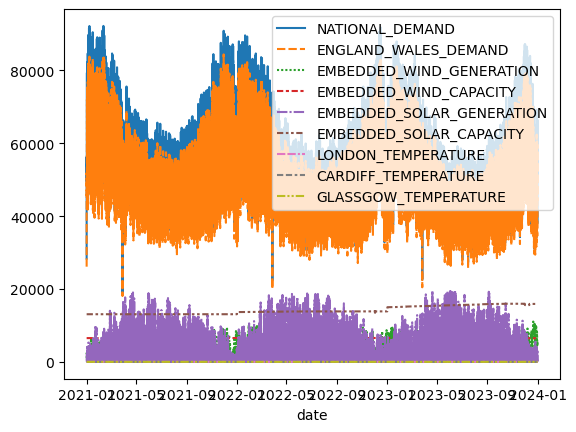

In [137]:
import seaborn as sb
sb.lineplot(data = data)

<Axes: xlabel='NATIONAL_DEMAND'>

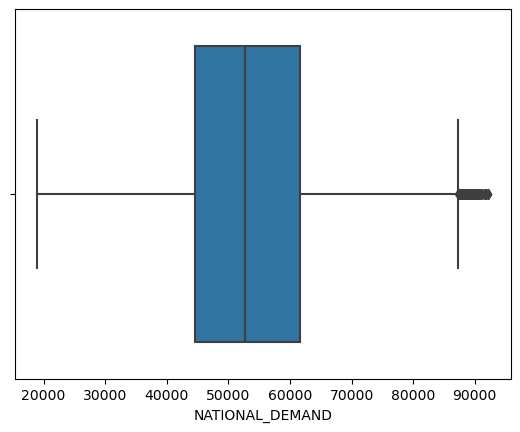

In [138]:
sb.boxplot(x=data['NATIONAL_DEMAND']) # Bloxplot using seaborn

In [139]:
Q1 = data['NATIONAL_DEMAND'].quantile(0.25)

print(Q1)
Q3 = data['NATIONAL_DEMAND'].quantile(0.75)
print(Q3)
IQR = Q3 - Q1
print(IQR)

44561.0
61626.5
17065.5


In [140]:
print((data['NATIONAL_DEMAND'] < (Q1 - 1.5 * IQR)) | (data['NATIONAL_DEMAND'] > (Q3 + 1.5 * IQR))) 

date
2021-01-01 00:00:00    False
2021-01-01 01:00:00    False
2021-01-01 02:00:00    False
2021-01-01 03:00:00    False
2021-01-01 04:00:00    False
                       ...  
2023-12-31 18:00:00    False
2023-12-31 19:00:00    False
2023-12-31 20:00:00    False
2023-12-31 21:00:00    False
2023-12-31 22:00:00    False
Name: NATIONAL_DEMAND, Length: 26279, dtype: bool


In [143]:
df_data = data[((data['NATIONAL_DEMAND'] > (Q1 - 1.5 * IQR)) & (data['NATIONAL_DEMAND'] < (Q3 + 1.5 * IQR)))]
df_data

,NATIONAL_DEMAND,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,LONDON_TEMPERATURE,CARDIFF_TEMPERATURE,GLASSGOW_TEMPERATURE
date,,,,,,,,,
2021-01-01 00:00:00,28354,26130,1018,6527.0,0,13080.0,-0.1935,-2.3465,-0.3245
2021-01-01 01:00:00,56260,51838,2065,6527.0,0,13080.0,-0.7435,-2.6965,-1.1245
2021-01-01 02:00:00,52916,48725,2128,6527.0,0,13080.0,-1.1435,-2.8465,-1.4245
2021-01-01 03:00:00,50100,45950,2218,6527.0,0,13080.0,-1.7435,-3.1465,-0.7245
2021-01-01 04:00:00,47959,43959,2302,6527.0,0,13080.0,-2.3935,-3.0965,-0.9245
...,...,...,...,...,...,...,...,...,...
2023-12-31 18:00:00,66208,59281,5101,6488.0,0,15905.0,8.0565,7.9035,3.7255
2023-12-31 19:00:00,62802,56105,5142,6488.0,0,15905.0,7.9565,7.7535,2.3255
2023-12-31 20:00:00,58104,51965,5223,6488.0,0,15905.0,7.6565,7.6035,2.0255


#   Feature Selection

In [146]:
#Hour of the day
df_data['HOUR']=df_data.index.hour

#Day of the week
df_data['DAY_OF_WEEK']=df_data.index.dayofweek

# Previous hour demand
df_data['NATIONAL_DEMAND-1']=df_data['NATIONAL_DEMAND'].shift(1)


C:\Users\ARJUN J\AppData\Local\Temp\ipykernel_1556\1294359905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['HOUR']=df_data.index.hour
C:\Users\ARJUN J\AppData\Local\Temp\ipykernel_1556\1294359905.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['DAY_OF_WEEK']=df_data.index.dayofweek
C:\Users\ARJUN J\AppData\Local\Temp\ipykernel_1556\1294359905.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [147]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26199 entries, 2021-01-01 00:00:00 to 2023-12-31 22:00:00
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   NATIONAL_DEMAND            26199 non-null  int64  
 1   ENGLAND_WALES_DEMAND       26199 non-null  int64  
 2   EMBEDDED_WIND_GENERATION   26199 non-null  int64  
 3   EMBEDDED_WIND_CAPACITY     26199 non-null  float64
 4   EMBEDDED_SOLAR_GENERATION  26199 non-null  int64  
 5   EMBEDDED_SOLAR_CAPACITY    26199 non-null  float64
 6   LONDON_TEMPERATURE         26199 non-null  float32
 7   CARDIFF_TEMPERATURE        26199 non-null  float32
 8   GLASSGOW_TEMPERATURE       26199 non-null  float32
 9   HOUR                       26199 non-null  int32  
 10  DAY_OF_WEEK                26199 non-null  int32  
 11  NATIONAL_DEMAND-1          26198 non-null  float64
dtypes: float32(3), float64(3), int32(2), int64(4)
memory usage: 2.1 MB


In [148]:
df_data=df_data.dropna()

In [194]:
# Define input and outputs
Z=df_data.values

Y=Z[:,0]
X=Z[:,[6,7,8,9,10,11]]
X2=Z[:,[6,9,11]]

## 1- Filter Method

In [150]:
from sklearn.feature_selection import SelectKBest # selection method
from sklearn.feature_selection import mutual_info_regression,f_regression # score metric (f_regression)


In [155]:
features=SelectKBest(k=5,score_func=mutual_info_regression) # Test different k number of features, uses f-test ANOVA
#features=SelectKBest(k=3,score_func=mutual_info_regression) # Test different k number of features, uses f-test ANOVA

fit=features.fit(X,Y) #calculates the f_regression of the features
print(fit.scores_)
features_results=fit.transform(X)
print(features_results) # k=0:Power-1 k=1:solarRad_W/m2 k=2:Hour k=3:Week Day k=4:Week-Day^2

[0.20866669 0.18604099 0.17317876 0.37716955 0.03842709 1.37946076]
[[-7.43499994e-01 -2.69650006e+00 -1.12449992e+00  1.00000000e+00
   2.83540000e+04]
 [-1.14349997e+00 -2.84649992e+00 -1.42449999e+00  2.00000000e+00
   5.62600000e+04]
 [-1.74349999e+00 -3.14650011e+00 -7.24499941e-01  3.00000000e+00
   5.29160000e+04]
 ...
 [ 7.65649986e+00  7.60349989e+00  2.02550006e+00  2.00000000e+01
   6.28020000e+04]
 [ 8.05650043e+00  7.95349979e+00  1.02550006e+00  2.10000000e+01
   5.81040000e+04]
 [ 7.65649986e+00  7.95349979e+00  1.72549999e+00  2.20000000e+01
   5.33730000e+04]]


<BarContainer object of 6 artists>

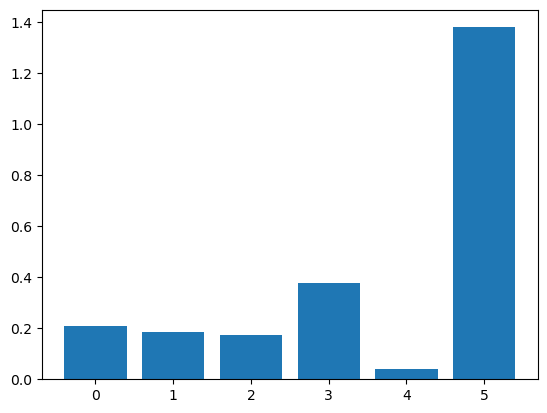

In [156]:
import matplotlib.pyplot as plt
plt.bar([i for i in range(len(fit.scores_))], fit.scores_)

## 2- Wrapper methods 

In [157]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [158]:
model=LinearRegression() # LinearRegression Model as Estimator
rfe1=RFE(model,n_features_to_select=1)# using 1 features
rfe2=RFE(model,n_features_to_select=2) # using 2 features
rfe3=RFE(model,n_features_to_select=3)# using 3 features
fit1=rfe1.fit(X,Y)
fit2=rfe2.fit(X,Y)
fit3=rfe3.fit(X,Y)

In [159]:
print( "Feature Ranking (Linear Model, 1 features): %s" % (fit1.ranking_))
print( "Feature Ranking (Linear Model, 2 features): %s" % (fit2.ranking_)) 
print( "Feature Ranking (Linear Model, 3 features): %s" % (fit3.ranking_)) 

Feature Ranking (Linear Model, 1 features): [5 3 4 2 1 6]
Feature Ranking (Linear Model, 2 features): [4 2 3 1 1 5]
Feature Ranking (Linear Model, 3 features): [3 1 2 1 1 4]


## 3- Emsemble methods 

In [160]:
from sklearn.ensemble import RandomForestRegressor

In [161]:
model = RandomForestRegressor()
model.fit(X, Y)
print(model.feature_importances_)

[0.00242871 0.00192047 0.00223861 0.06562962 0.00260616 0.92517644]


# Regression 

In [195]:
#by default, it chooses randomly 75% of the data for training and 25% for testing
from sklearn.model_selection import train_test_split
import numpy as np 
from sklearn import  metrics
X_train, X_test, y_train, y_test = train_test_split(X,Y)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,Y)

In [172]:
from sklearn import  linear_model

# Create linear regression object
Lregr = linear_model.LinearRegression()

# Train the model using the training sets
Lregr.fit(X_train,y_train)

# Make predictions using the testing set
y_pred_LR = Lregr.predict(X_test)


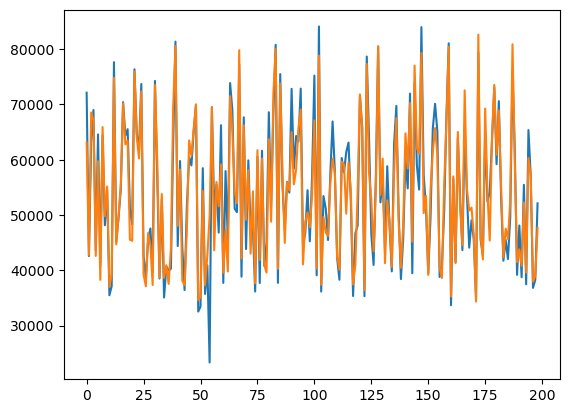

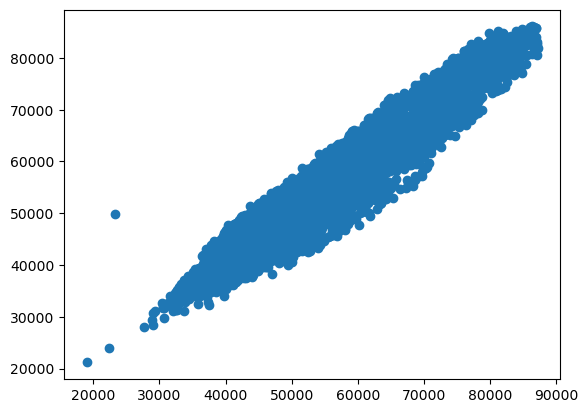

In [173]:
plt.plot(y_test[1:200])
plt.plot(y_pred_LR[1:200])
plt.show()
plt.scatter(y_test,y_pred_LR)

In [214]:
#Evaluate errors
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MBE_LR=np.mean(y_test- y_pred_LR) #here we calculate MBE
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
cvRMSE_LR=RMSE_LR/np.mean(y_test)
NMBE_LR=MBE_LR/np.mean(y_test)
result = pd.DataFrame({
    'MAE': [MAE_LR],
    'MBE': [MBE_LR],
    'MSE': [MSE_LR],
    'RMSE': [RMSE_LR],
    'cvRMSE': [cvRMSE_LR],
    'NMBE': [NMBE_LR]
},index=['Linear Regression'])
result.index.name = 'REGRESSION METHOD' 
result

,MAE,MBE,MSE,RMSE,cvRMSE,NMBE
REGRESSION METHOD,,,,,,
Linear Regression,13624.010689,-438.74271,2.888205e+08,16994.719427,0.316716,-0.008176


## 2-  Support Vector Regressor

### Scale data 

In [175]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

ss_X = StandardScaler()
ss_y = StandardScaler()
X_train_ss = ss_X.fit_transform(X_train)
y_train_ss = ss_y.fit_transform(y_train.reshape(-1,1))

In [176]:
Sregr = SVR(kernel='linear')
#kernel='linear'
#kernel='sigmoid'
#kernel='rbf'

Sregr.fit(X_train_ss,y_train_ss)

E:\Softwares\anaconda\envs\dashboards\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

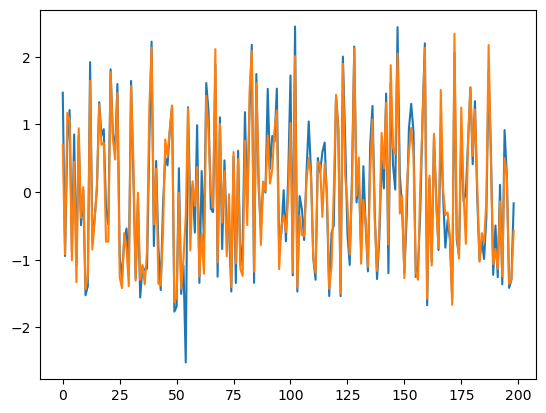

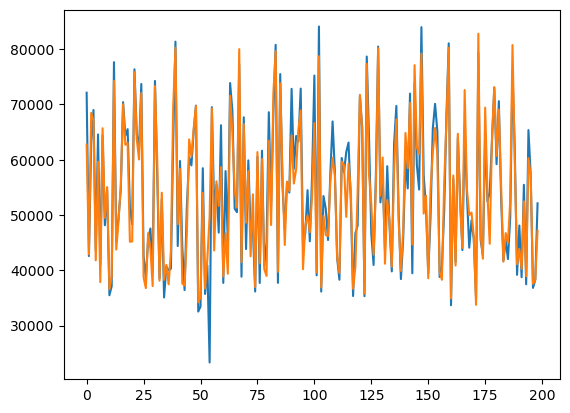

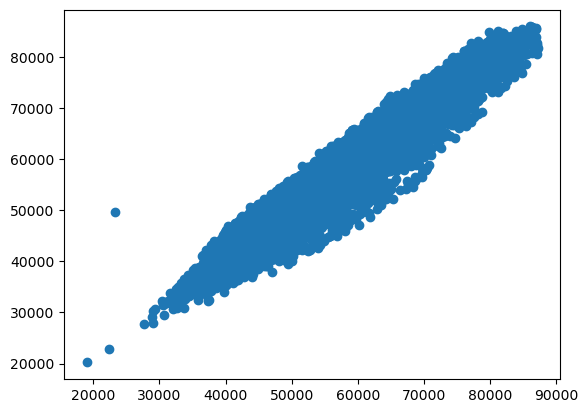

In [177]:
y_pred_SVR = Sregr.predict(ss_X.fit_transform(X_test))
y_test_SVR=ss_y.fit_transform(y_test.reshape(-1,1))#It is just one column we have to reshape, otherwise its a line
y_pred_SVR2=ss_y.inverse_transform(y_pred_SVR.reshape(-1,1))

plt.plot(y_test_SVR[1:200])
plt.plot(y_pred_SVR[1:200])
plt.show()
plt.plot(y_test[1:200])
plt.plot(y_pred_SVR2[1:200])
plt.show()
plt.scatter(y_test, y_pred_SVR2)

In [215]:
MAE_SVR=metrics.mean_absolute_error(y_test_SVR,y_pred_SVR) 
MBE_SVR=np.mean(y_test- y_pred_SVR) #here we calculate MBE
MSE_SVR=metrics.mean_squared_error(y_test_SVR,y_pred_SVR)  
RMSE_SVR= np.sqrt(metrics.mean_squared_error(y_test_SVR,y_pred_SVR))
cvRMSE_SVR=RMSE_SVR/np.mean(y_test)
NMBE_SVR=MBE_SVR/np.mean(y_test)
result.loc['Support Vector Regression'] = [MAE_SVR, MBE_SVR, MSE_SVR, RMSE_SVR, cvRMSE_SVR, NMBE_SVR]
result

,MAE,MBE,MSE,RMSE,cvRMSE,NMBE
REGRESSION METHOD,,,,,,
Linear Regression,13624.010689,-438.74271,2.888205e+08,16994.719427,0.316716,-0.008176
Support Vector Regression,0.214868,53659.27851,8.108967e-02,0.284762,0.000005,1.000000


## 3- Decision Tree Regressor 

In [179]:
from sklearn.tree import DecisionTreeRegressor

# Create Regression Decision Tree object
DT_regr_model = DecisionTreeRegressor(min_samples_leaf=5)

# Train the model using the training sets
DT_regr_model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_DT = DT_regr_model.predict(X_test)

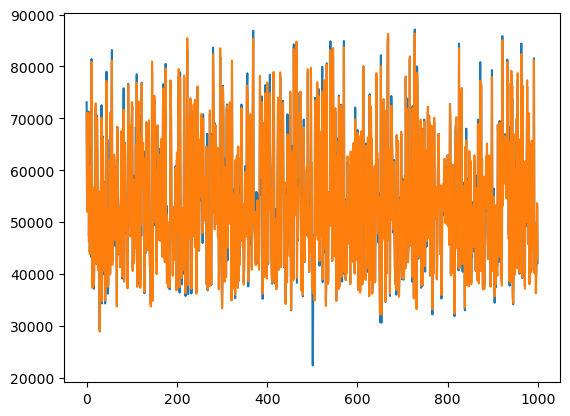

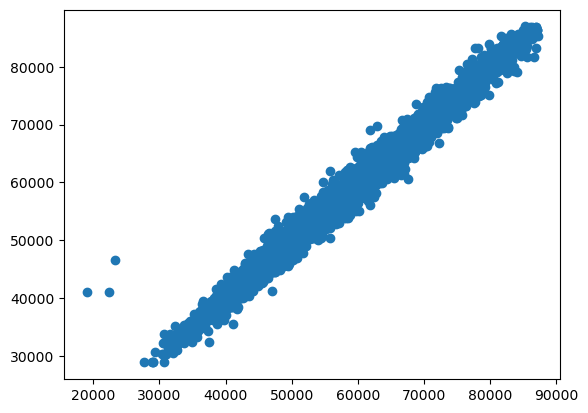

In [180]:
plt.plot(y_test[1000:2000])
plt.plot(y_pred_DT[1000:2000])
plt.show()
plt.scatter(y_test,y_pred_DT)

In [216]:
#Evaluate errors
MAE_DT=metrics.mean_absolute_error(y_test,y_pred_DT) 
MBE_DT=np.mean(y_test-y_pred_DT) #here we calculate MBE
MSE_DT=metrics.mean_squared_error(y_test,y_pred_DT)  
RMSE_DT= np.sqrt(metrics.mean_squared_error(y_test,y_pred_DT))
cvRMSE_DT=RMSE_DT/np.mean(y_test)
NMBE_DT=MBE_DT/np.mean(y_test)
result.loc['Decision Tree Regression'] = [MAE_DT, MBE_DT,MSE_DT, RMSE_DT,cvRMSE_DT,NMBE_DT]
result

,MAE,MBE,MSE,RMSE,cvRMSE,NMBE
REGRESSION METHOD,,,,,,
Linear Regression,13624.010689,-438.742710,2.888205e+08,16994.719427,0.316716,-0.008176
Support Vector Regression,0.214868,53659.278510,8.108967e-02,0.284762,0.000005,1.000000
Decision Tree Regression,13874.009885,-463.340279,2.981909e+08,17268.203777,0.321812,-0.008635


## 4- Random forest 

In [186]:
from sklearn.ensemble import RandomForestRegressor

In [187]:
parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 200, 
              'min_samples_split': 15,
              'max_features': 'sqrt',
              'max_depth': 20,
              'max_leaf_nodes': None}
RF_model = RandomForestRegressor(**parameters)
#RF_model = RandomForestRegressor()
RF_model.fit(X_train, y_train)
y_pred_RF = RF_model.predict(X_test)

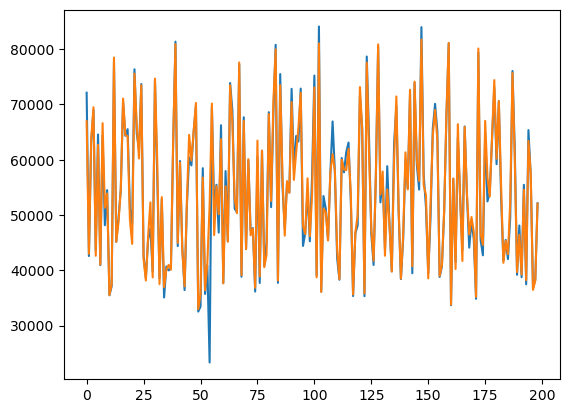

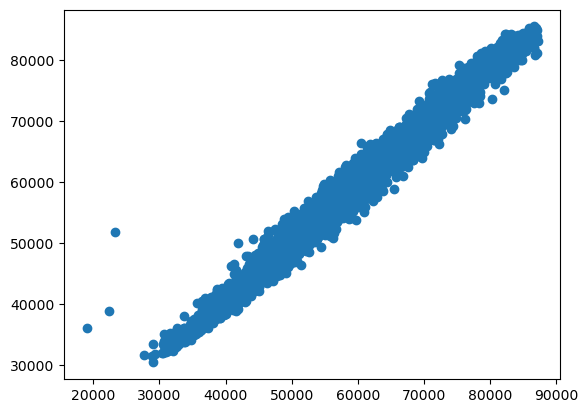

In [188]:
plt.plot(y_test[1:200])
plt.plot(y_pred_RF[1:200])
plt.show()
plt.scatter(y_test,y_pred_RF)

In [217]:
#Evaluate errors

MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MBE_RF=np.mean(y_test-y_pred_RF) #here we calculate MBE
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
cvRMSE_RF=RMSE_RF/np.mean(y_test)
NMBE_RF=MBE_RF/np.mean(y_test)
result.loc['Random Forest Regression'] = [MAE_RF,MBE_RF,MSE_RF,RMSE_RF,cvRMSE_RF,NMBE_RF]
result

,MAE,MBE,MSE,RMSE,cvRMSE,NMBE
REGRESSION METHOD,,,,,,
Linear Regression,13624.010689,-438.742710,2.888205e+08,16994.719427,0.316716,-0.008176
Support Vector Regression,0.214868,53659.278510,8.108967e-02,0.284762,0.000005,1.000000
Decision Tree Regression,13874.009885,-463.340279,2.981909e+08,17268.203777,0.321812,-0.008635
Random Forest Regression,13703.398167,-453.834245,2.909976e+08,17058.652687,0.317907,-0.008458


## 5-Uniformized data 

In [190]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Random forest uniformized data 

In [191]:
parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 100, 
              'min_samples_split': 15,
              'max_features': 'sqrt',
              'max_depth': 10,
              'max_leaf_nodes': None}

RF_model2 = RandomForestRegressor(**parameters)
RF_model2.fit(X_train_scaled, y_train.reshape(-1,1))
y_pred_RF2 = RF_model2.predict(X_test_scaled)


C:\Users\ARJUN J\AppData\Local\Temp\ipykernel_1556\4214403256.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model2.fit(X_train_scaled, y_train.reshape(-1,1))


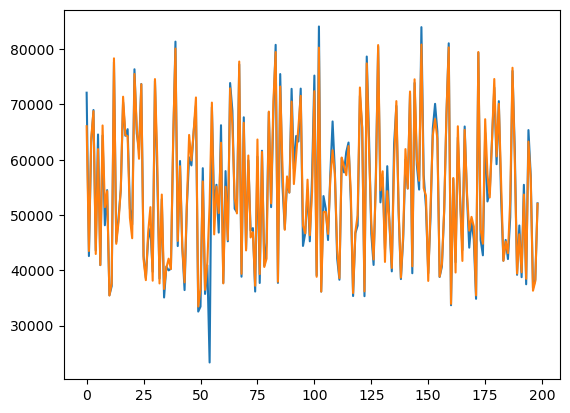

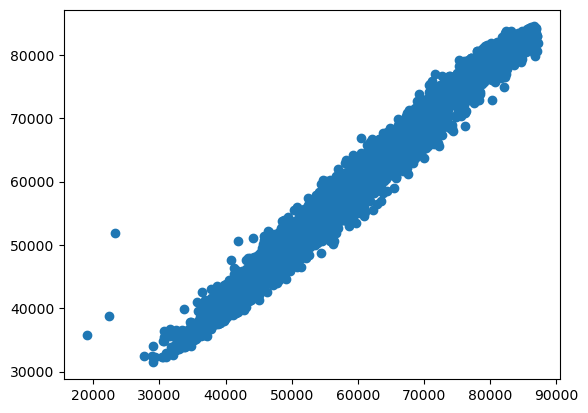

In [192]:
plt.plot(y_test[1:200])
plt.plot(y_pred_RF2[1:200])
plt.show()
plt.scatter(y_test,y_pred_RF2)

In [218]:
#Evaluate errors
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF2) 
MBE_RF=np.mean(y_test-y_pred_RF2) #here we calculate MBE
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF2)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF2))
cvRMSE_RF=RMSE_RF/np.mean(y_test)
NMBE_RF=MBE_RF/np.mean(y_test)
result.loc['Uniform Random Forest Regression'] = [MAE_RF,MBE_RF,MSE_RF,RMSE_RF,cvRMSE_RF,NMBE_RF]
result

,MAE,MBE,MSE,RMSE,cvRMSE,NMBE
REGRESSION METHOD,,,,,,
Linear Regression,13624.010689,-438.742710,2.888205e+08,16994.719427,0.316716,-0.008176
Support Vector Regression,0.214868,53659.278510,8.108967e-02,0.284762,0.000005,1.000000
Decision Tree Regression,13874.009885,-463.340279,2.981909e+08,17268.203777,0.321812,-0.008635
Random Forest Regression,13703.398167,-453.834245,2.909976e+08,17058.652687,0.317907,-0.008458
Uniform Random Forest Regression,13635.989810,-448.712967,2.878904e+08,16967.334419,0.316205,-0.008362


## 6- Trying Less features 

In [196]:
RF2_model = RandomForestRegressor(**parameters)
#RF_model = RandomForestRegressor()
RF2_model.fit(X2_train, y2_train)
y2_pred_RF = RF2_model.predict(X2_test)

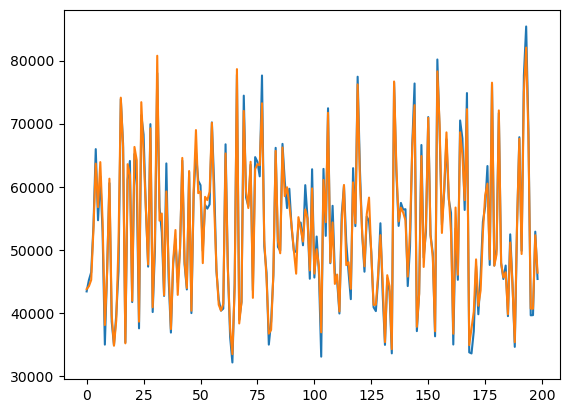

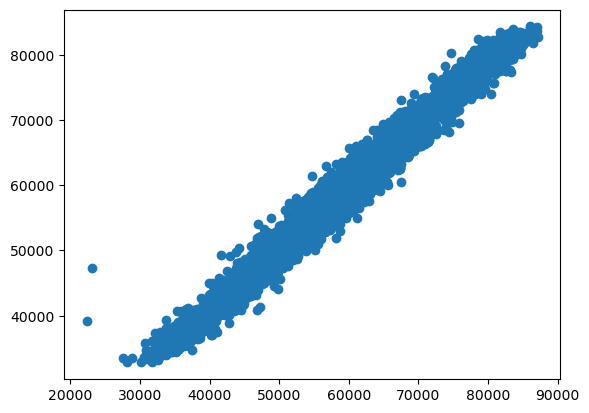

In [197]:
plt.plot(y2_test[1:200])
plt.plot(y2_pred_RF[1:200])
plt.show()
plt.scatter(y2_test,y2_pred_RF)

In [219]:
#Evaluate errors
MAE_RF2=metrics.mean_absolute_error(y2_test,y2_pred_RF) 
MBE_RF2=np.mean(y2_test-y2_pred_RF) #here we calculate MBE
MSE_RF2=metrics.mean_squared_error(y2_test,y2_pred_RF)  
RMSE_RF2= np.sqrt(metrics.mean_squared_error(y2_test,y2_pred_RF))
cvRMSE_RF2=RMSE_RF2/np.mean(y2_test)
NMBE_RF2=MBE_RF2/np.mean(y2_test)
print(MAE_RF2,MBE_RF2,MSE_RF2,RMSE_RF2,cvRMSE_RF2,NMBE_RF2)
result.loc['Random Forest Regression 3 Features'] = [MAE_RF2,MBE_RF2,MSE_RF2,RMSE_RF2,cvRMSE_RF2,NMBE_RF2]
result

1274.7711365515693 -17.038677570579278 2905116.644194944 1704.440272991384 0.03156759379545231 -0.000315569903435654


,MAE,MBE,MSE,RMSE,cvRMSE,NMBE
REGRESSION METHOD,,,,,,
Linear Regression,13624.010689,-438.742710,2.888205e+08,16994.719427,0.316716,-0.008176
Support Vector Regression,0.214868,53659.278510,8.108967e-02,0.284762,0.000005,1.000000
Decision Tree Regression,13874.009885,-463.340279,2.981909e+08,17268.203777,0.321812,-0.008635
Random Forest Regression,13703.398167,-453.834245,2.909976e+08,17058.652687,0.317907,-0.008458
Uniform Random Forest Regression,13635.989810,-448.712967,2.878904e+08,16967.334419,0.316205,-0.008362
Random Forest Regression 3 Features,1274.771137,-17.038678,2.905117e+06,1704.440273,0.031568,-0.000316


## 7- Gradient Boosting 

In [199]:
from sklearn.ensemble import GradientBoostingRegressor

#params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
#          'learning_rate': 0.01, 'loss': 'ls'}
#GB_model = GradientBoostingRegressor(**params)

GB_model = GradientBoostingRegressor()
GB_model.fit(X_train, y_train)
y_pred_GB =GB_model.predict(X_test)

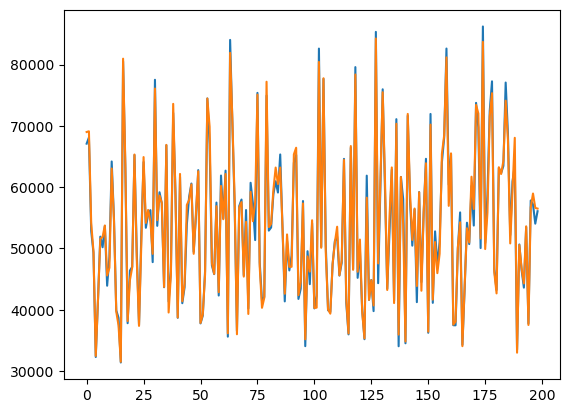

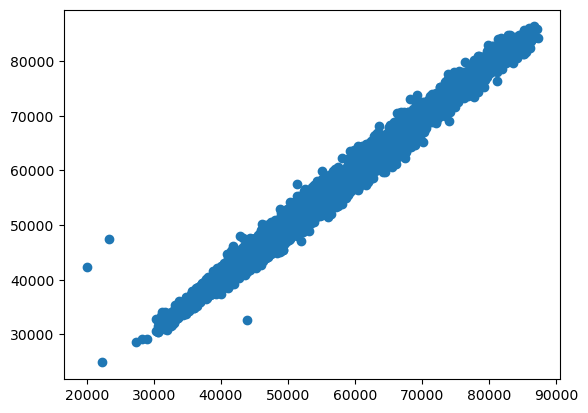

In [200]:
plt.plot(y_test[1:200])
plt.plot(y_pred_GB[1:200])
plt.show()
plt.scatter(y_test,y_pred_GB)

In [220]:
MAE_GB=metrics.mean_absolute_error(y_test,y_pred_GB) 
MBE_GB=np.mean(y_test-y_pred_GB)
MSE_GB=metrics.mean_squared_error(y_test,y_pred_GB)  
RMSE_GB= np.sqrt(metrics.mean_squared_error(y_test,y_pred_GB))
cvRMSE_GB=RMSE_GB/np.mean(y_test)
NMBE_GB=MBE_GB/np.mean(y_test)
result.loc['Gradient Boosting Regression'] = [MAE_GB,MBE_GB,MSE_GB,RMSE_GB,cvRMSE_GB,NMBE_GB]
result

,MAE,MBE,MSE,RMSE,cvRMSE,NMBE
REGRESSION METHOD,,,,,,
Linear Regression,13624.010689,-438.742710,2.888205e+08,16994.719427,0.316716,-0.008176
Support Vector Regression,0.214868,53659.278510,8.108967e-02,0.284762,0.000005,1.000000
Decision Tree Regression,13874.009885,-463.340279,2.981909e+08,17268.203777,0.321812,-0.008635
Random Forest Regression,13703.398167,-453.834245,2.909976e+08,17058.652687,0.317907,-0.008458
Uniform Random Forest Regression,13635.989810,-448.712967,2.878904e+08,16967.334419,0.316205,-0.008362
Random Forest Regression 3 Features,1274.771137,-17.038678,2.905117e+06,1704.440273,0.031568,-0.000316
Gradient Boosting Regression,973.639065,-1.010845,1.806781e+06,1344.165683,0.025050,-0.000019


## 8- Extreme Gradient Boosting 

In [221]:
from xgboost import XGBRegressor

#params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
#          'learning_rate': 0.01, 'loss': 'ls'}
#GB_model = GradientBoostingRegressor(**params)

XGB_model = XGBRegressor()
XGB_model.fit(X_train, y_train)
y_pred_XGB =XGB_model.predict(X_test)

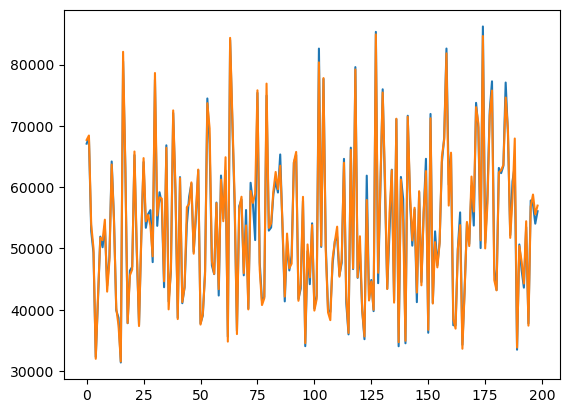

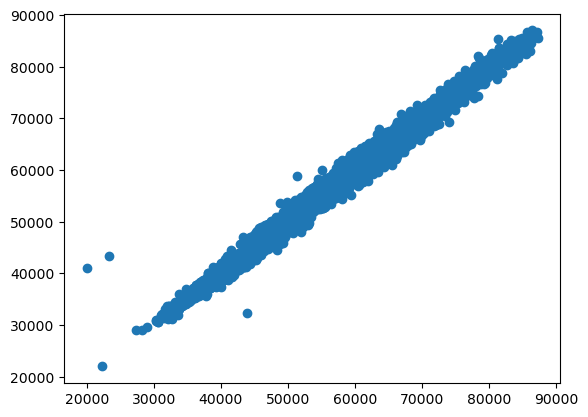

In [222]:
plt.plot(y_test[1:200])
plt.plot(y_pred_XGB[1:200])
plt.show()
plt.scatter(y_test,y_pred_XGB)

In [229]:
MAE_XGB=metrics.mean_absolute_error(y_test,y_pred_XGB) 
MBE_XGB=np.mean(y_test-y_pred_XGB)
MSE_XGB=metrics.mean_squared_error(y_test,y_pred_XGB)  
RMSE_XGB= np.sqrt(metrics.mean_squared_error(y_test,y_pred_XGB))
cvRMSE_XGB=RMSE_XGB/np.mean(y_test)
NMBE_XGB=MBE_XGB/np.mean(y_test)
result.loc['Extreme Gradient Boosting Regression'] = [MAE_XGB,MBE_XGB,MSE_XGB,RMSE_XGB,cvRMSE_XGB,NMBE_XGB]
result

,MAE,MBE,MSE,RMSE,cvRMSE,NMBE
REGRESSION METHOD,,,,,,
Linear Regression,13624.010689,-438.742710,2.888205e+08,16994.719427,0.316716,-0.008176
Support Vector Regression,0.214868,53659.278510,8.108967e-02,0.284762,0.000005,1.000000
Decision Tree Regression,13874.009885,-463.340279,2.981909e+08,17268.203777,0.321812,-0.008635
Random Forest Regression,13703.398167,-453.834245,2.909976e+08,17058.652687,0.317907,-0.008458
Uniform Random Forest Regression,13635.989810,-448.712967,2.878904e+08,16967.334419,0.316205,-0.008362
Random Forest Regression 3 Features,1274.771137,-17.038678,2.905117e+06,1704.440273,0.031568,-0.000316
Gradient Boosting Regression,973.639065,-1.010845,1.806781e+06,1344.165683,0.025050,-0.000019
Extreme Gradient Boosting Regression,812.273551,-6.988939,1.296593e+06,1138.680354,0.021221,-0.000130
Bootstrapping Regression,851.154672,-8.137542,1.494681e+06,1222.571650,0.022784,-0.000152


## 9- Bootstrapping 

In [204]:
from sklearn.ensemble import BaggingRegressor

BT_model = BaggingRegressor()
BT_model.fit(X_train, y_train)
y_pred_BT =BT_model.predict(X_test)


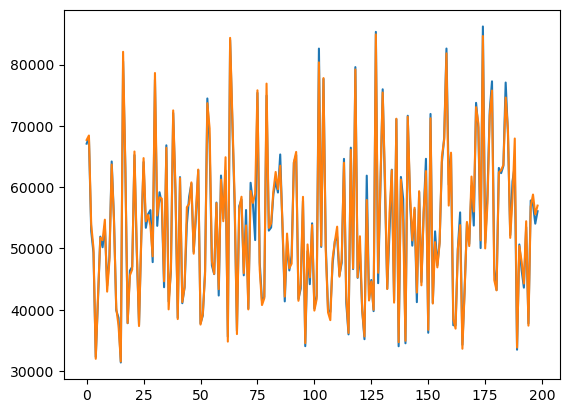

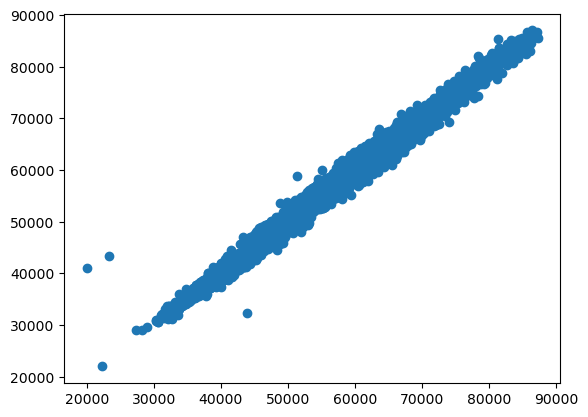

In [205]:
plt.plot(y_test[1:200])
plt.plot(y_pred_XGB[1:200])
plt.show()
plt.scatter(y_test,y_pred_XGB)

In [224]:
MAE_BT=metrics.mean_absolute_error(y_test,y_pred_BT) 
MBE_BT=np.mean(y_test-y_pred_BT)
MSE_BT=metrics.mean_squared_error(y_test,y_pred_BT)  
RMSE_BT= np.sqrt(metrics.mean_squared_error(y_test,y_pred_BT))
cvRMSE_BT=RMSE_BT/np.mean(y_test)
NMBE_BT=MBE_BT/np.mean(y_test)
result.loc['Bootstrapping Regression'] = [MAE_BT,MBE_BT,MSE_BT,RMSE_BT,cvRMSE_BT,NMBE_BT]
result

,MAE,MBE,MSE,RMSE,cvRMSE,NMBE
REGRESSION METHOD,,,,,,
Linear Regression,13624.010689,-438.742710,2.888205e+08,16994.719427,0.316716,-0.008176
Support Vector Regression,0.214868,53659.278510,8.108967e-02,0.284762,0.000005,1.000000
Decision Tree Regression,13874.009885,-463.340279,2.981909e+08,17268.203777,0.321812,-0.008635
Random Forest Regression,13703.398167,-453.834245,2.909976e+08,17058.652687,0.317907,-0.008458
Uniform Random Forest Regression,13635.989810,-448.712967,2.878904e+08,16967.334419,0.316205,-0.008362
Random Forest Regression 3 Features,1274.771137,-17.038678,2.905117e+06,1704.440273,0.031568,-0.000316
Gradient Boosting Regression,973.639065,-1.010845,1.806781e+06,1344.165683,0.025050,-0.000019
Extreme Gradient Boosting Regression,812.273551,-6.988939,1.296593e+06,1138.680354,0.021221,-0.000019
Bootstrapping Regression,851.154672,-8.137542,1.494681e+06,1222.571650,0.022784,-0.000152


## 10- Neural Networks 

In [209]:
from sklearn.neural_network import MLPRegressor

NN_model = MLPRegressor(hidden_layer_sizes=(5,5,5))
NN_model.fit(X_train,y_train)
y_pred_NN = NN_model.predict(X_test)


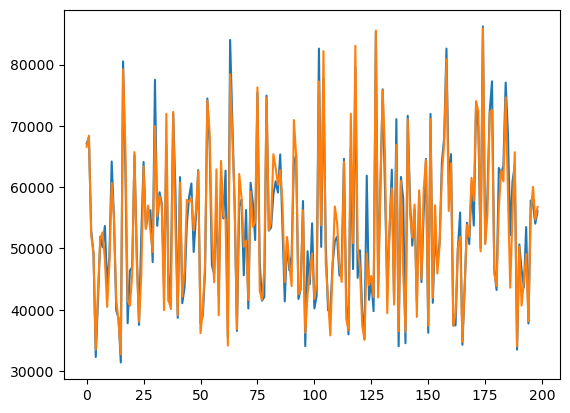

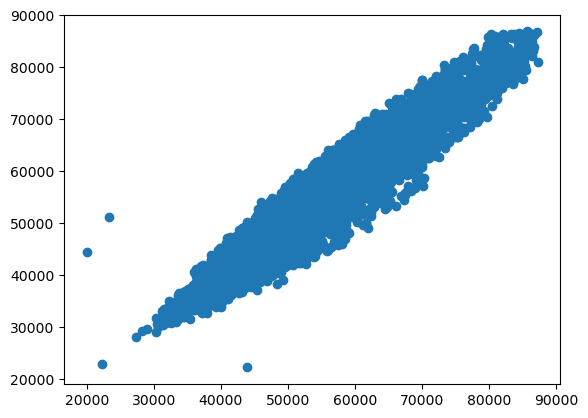

In [210]:
plt.plot(y_test[1:200])
plt.plot(y_pred_NN[1:200])
plt.show()
plt.scatter(y_test,y_pred_NN)

In [225]:
MAE_NN=metrics.mean_absolute_error(y_test,y_pred_NN)
MBE_NN=np.mean(y_test-y_pred_NN)
MSE_NN=metrics.mean_squared_error(y_test,y_pred_NN)  
RMSE_NN= np.sqrt(metrics.mean_squared_error(y_test,y_pred_NN))
cvRMSE_NN=RMSE_NN/np.mean(y_test)
NMBE_NN=MBE_NN/np.mean(y_test)
result.loc['Neural Network Regression'] = [MAE_NN,MBE_NN,MSE_NN,RMSE_NN,cvRMSE_NN,NMBE_NN]
result

,MAE,MBE,MSE,RMSE,cvRMSE,NMBE
REGRESSION METHOD,,,,,,
Linear Regression,13624.010689,-438.742710,2.888205e+08,16994.719427,0.316716,-0.008176
Support Vector Regression,0.214868,53659.278510,8.108967e-02,0.284762,0.000005,1.000000
Decision Tree Regression,13874.009885,-463.340279,2.981909e+08,17268.203777,0.321812,-0.008635
Random Forest Regression,13703.398167,-453.834245,2.909976e+08,17058.652687,0.317907,-0.008458
Uniform Random Forest Regression,13635.989810,-448.712967,2.878904e+08,16967.334419,0.316205,-0.008362
Random Forest Regression 3 Features,1274.771137,-17.038678,2.905117e+06,1704.440273,0.031568,-0.000316
Gradient Boosting Regression,973.639065,-1.010845,1.806781e+06,1344.165683,0.025050,-0.000019
Extreme Gradient Boosting Regression,812.273551,-6.988939,1.296593e+06,1138.680354,0.021221,-0.000019
Bootstrapping Regression,851.154672,-8.137542,1.494681e+06,1222.571650,0.022784,-0.000152


## 11- Trying less features

In [226]:

XGB_model2 = XGBRegressor()
XGB_model2.fit(X2_train, y2_train)
y2_pred_XGB =XGB_model2.predict(X2_test)

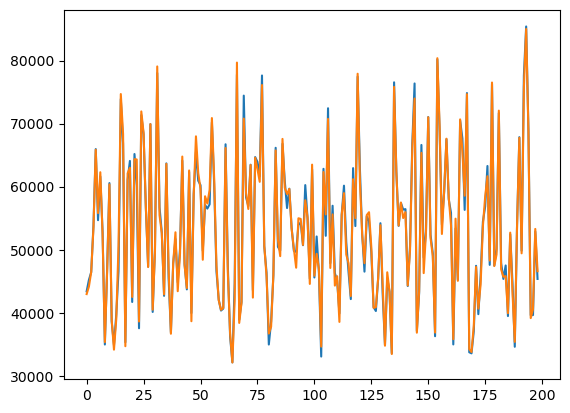

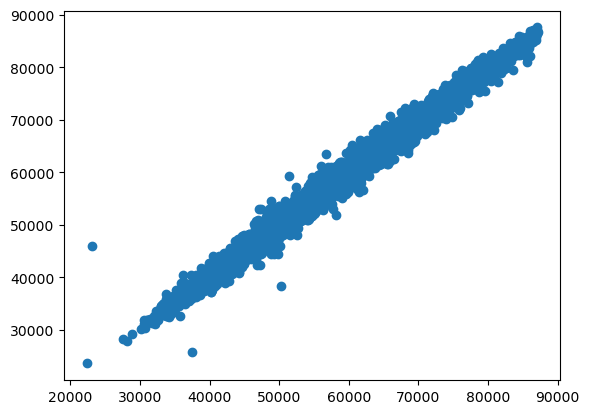

In [227]:
plt.plot(y2_test[1:200])
plt.plot(y2_pred_XGB[1:200])
plt.show()
plt.scatter(y2_test,y2_pred_XGB)

In [230]:
MAE_XGB2=metrics.mean_absolute_error(y2_test,y2_pred_XGB) 
MBE_XGB2=np.mean(y2_test-y2_pred_XGB)
MSE_XGB2=metrics.mean_squared_error(y2_test,y2_pred_XGB)  
RMSE_XGB2= np.sqrt(metrics.mean_squared_error(y2_test,y2_pred_XGB))
cvRMSE_XGB2=RMSE_XGB2/np.mean(y2_test)
NMBE_XGB2=MBE_XGB2/np.mean(y2_test)
result.loc['Extreme Gradient Boosting Regression 3 Features'] = [MAE_XGB2,MBE_XGB2,MSE_XGB2,RMSE_XGB2,cvRMSE_XGB2,NMBE_XGB2]
result

,MAE,MBE,MSE,RMSE,cvRMSE,NMBE
REGRESSION METHOD,,,,,,
Linear Regression,13624.010689,-438.742710,2.888205e+08,16994.719427,0.316716,-0.008176
Support Vector Regression,0.214868,53659.278510,8.108967e-02,0.284762,0.000005,1.000000
Decision Tree Regression,13874.009885,-463.340279,2.981909e+08,17268.203777,0.321812,-0.008635
Random Forest Regression,13703.398167,-453.834245,2.909976e+08,17058.652687,0.317907,-0.008458
Uniform Random Forest Regression,13635.989810,-448.712967,2.878904e+08,16967.334419,0.316205,-0.008362
Random Forest Regression 3 Features,1274.771137,-17.038678,2.905117e+06,1704.440273,0.031568,-0.000316
Gradient Boosting Regression,973.639065,-1.010845,1.806781e+06,1344.165683,0.025050,-0.000019
Extreme Gradient Boosting Regression,812.273551,-6.988939,1.296593e+06,1138.680354,0.021221,-0.000130
Bootstrapping Regression,851.154672,-8.137542,1.494681e+06,1222.571650,0.022784,-0.000152


# Saving Regression models

In [212]:
import pickle

In [213]:
with open('Lregr.pkl','wb') as file:
    pickle.dump(Lregr, file)
with open('Sregr.pkl','wb') as file:
    pickle.dump(Sregr, file)
with open('DT_regr_model.pkl','wb') as file:
    pickle.dump(DT_regr_model, file)
with open('RF_model.pkl','wb') as file:
    pickle.dump(RF_model, file)
with open('RF_model2.pkl','wb') as file:
    pickle.dump(RF_model2, file)
with open('RF2_model.pkl','wb') as file:
    pickle.dump(RF2_model, file)
with open('GB_model.pkl','wb') as file:
    pickle.dump(GB_model, file)
with open('XGB_model.pkl','wb') as file:
    pickle.dump(XGB_model, file)
with open('BT_model.pkl','wb') as file:
    pickle.dump(BT_model, file)
with open('NN_model.pkl','wb') as file:
    pickle.dump(NN_model, file)